<img src="https://becasparatodos.com/wp-content/uploads/2017/01/tec-de-monterrey-maestr%C3%ADas.jpg" style="width: 400px;"/>

<h2><center>Campus Ciudad de México, 
Escuela Ingeniería y Ciencias, 
Computación</center></h2>

<h4><center>Course: TC3020.1 (Machine Learning)</center>
<center>Professor: Mauricio Rosales Rivera</center>
<center>Final Project - Evaluation</center></h4>
    
<h4><center>Date: November 13, 2020</center></h4>
<h4><center><font color="red">Submit: November 24, 2020</font></center></h4>

---

<h4>Grade: </h4>

---
<h4><center>Students' Information</center></h4>

|<h4>Name</h4> | <h4>Student ID</h4>  |
|-|-|
| <h5>In Joong Kim</h5> | <h5>A01336967</h5> |
| <h5>Saul Neri Ortiz</h5> |<h5>A01652526</h5>  |
| <h5>Fernando Ríos</h5> |<h5>A01020706</h5>  |
| <h5>Víctor Eduardo López Pérez</h5> |<h5>A01336434</h5>  |
| <h5>Sergio Ugalde Marcano</h5> |<h5>A01336435</h5>  |

<h4>Github:</h4>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InJoong/Aprendizaje_Maquina/blob/master/proyecto/Template_Entrega_ML.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/feriosch/Aprendizaje_Maquina/blob/master/examenes/final/ExamenFinal.ipynb)

<center>Apegándome al Código de Ética de los Estudiantes del Tecnológico de Monterrey, me comprometo a que mi actuación en este proyecto esté regida por la honestidad académica. En congruencia con el compromiso adquirido al firmar dicho código, realizaré este proyecto de forma honesta y personal, para reflejar, a través de él, mi conocimiento y aceptar, posteriormente, la evaluación obtenida.</center>

## <font color="brown">Proyecto Final - Aprendizaje Máquina</font>

---

Indicaciones: El proyecto seleccionado será desarrollado siguiendo ciertas condiciones. Deberán seguir la estructura recomendada (pero podrán cambiar títulos, es sólo una sugerencia) y podrán añadir secciones en caso de que ser necesario.

* La entrega límite de entrega de la notebook será: Martes 24 de noviembre.
* Deberán realizar una exposición (entre 10 y 20 minutos a lo mucho), donde proporcionen una explicación acerca de la metodología implementada y los resultados obtenidos.

Esta notebook deberá contener el nombre completo, matrícula y el link correspondiente al GitHub de cada integrante.
En caso de no tener la información aquí solicitada, no se evaluará el proyecto.

<a id="general"></a>
### Contenido

-----

1. [Objetivo](#a)

2. [Exploración de Datos](#b)
    * Detección de valores faltantes
    * Agregando valores
    * Visualizando datos
    * Preprocesamiento de datos
        * Reducción de dimensiones
        
-----
3. [Selección de modelos](#c)
    * Aprendizaje No Supervisado / Supervisado
        * Selección de modelo
        * Selección de hiperparámetros
        * Entrenamiento
        * Prueba
        * Resultados
-----

4. [Conclusiones](#d)

-----

<a id="a"></a>
### 1. Objetivo

---
[Regresar a contenido](#general)

Intentar presentar un enfoque completo para modelar problemas, que va desde el análisis exploratorio de datos hasta la aplicación de técnicas de aprendizaje supervisado y no supervisado a nuestros datos.

El contenido de esta notebook está dirigido principalmente para entender mejor las etapas que se realizan en los problemas de Ciencia de Datos y Aprendizaje Máquina (y posiblemente en Aprendizaje Profundo).

<a id="b"></a>
### 2. Exploración de Datos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación del conjunto de datos a utilizar. Así como tener un orden al momento de importar librerías, mostrar gráficos del EDA y preprocesamiento de los datos.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Cargar datos
bitcoins = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv")
bitcoins.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cambiar la columna de Timestamp en un formato legible
bitcoins.Timestamp = pd.to_datetime(bitcoins.Timestamp, unit='s')
bitcoins.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Poner Timestamp como index
bitcoins.index = bitcoins.Timestamp

In [ ]:
# Re estructurar el dataset en dias
# Dolar
bitcoins = bitcoins.resample('D').mean()

# Peso (Mexico)
bitcoins_mexico = bitcoins.applymap(lambda x: x * 20.27)

In [ ]:
# Re estructurar el dataset en meses
# Dolar
bitcoins_month = bitcoins.resample('M').mean()

# Peso (Mexico)
bitcoins_mexico_month = bitcoins_month.applymap(lambda x: x * 20.27)

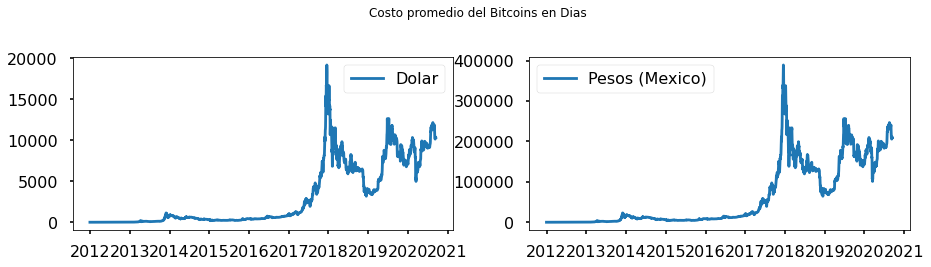

In [ ]:
# Plot dias
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Costo promedio del Bitcoins en Dias')

plt.subplot(221)
plt.plot(bitcoins.Weighted_Price, '-', label='Dolar')
plt.legend()

plt.subplot(222)
plt.plot(bitcoins_mexico.Weighted_Price, '-', label='Pesos (Mexico)')
plt.legend()

plt.show()

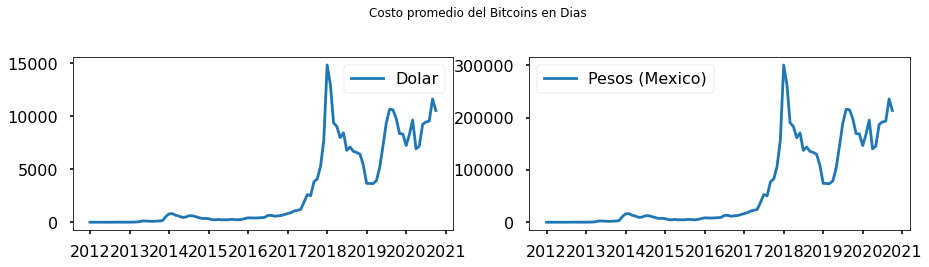

In [ ]:
# Plot meses
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Costo promedio del Bitcoins en Dias')

plt.subplot(221)
plt.plot(bitcoins_month.Weighted_Price, '-', label='Dolar')
plt.legend()

plt.subplot(222)
plt.plot(bitcoins_mexico_month.Weighted_Price, '-', label='Pesos (Mexico)')
plt.legend()

plt.show()

<a id="c"></a>
### 3. Selección de modelos

---
[Regresar a contenido](#general)

En esta sección se trata de realizar una breve explicación de la metodología de aprendizaje automático. En caso de aplicar un **pipeline** de aprendizaje no supervisado y / o supervisado, que tenga un orden claro y expliquen el porqué de su aplicación con lo que han percibido de sus datos. 

El modelo seleccionado, qué parámetros o hiperparámetros eligieron, el porqué entrenaron con cierto tamaño de muestra y los resultados obtenidos.

* Nosotros decidimos utilizar el modelo ARIMA, debido a que al leer un articulo comparando tres modelos: ARIMA, LSTM y GRU, ARIMA resulto con mayor precision. 

#### Pro procesamiento de datos

Podemos ver que la grafica no es estacionaria debidido a que esta no esta fijo por el tiempo (dias), por lo que tenemos que sacar el autocorrelation

In [ ]:
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

<Figure size 1080x504 with 0 Axes>

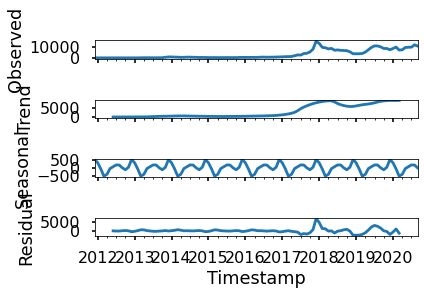

In [ ]:
# Utilizar la seasonal descompose para ver si encuentra un patron
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(bitcoins_month.Weighted_Price).plot()
plt.show()

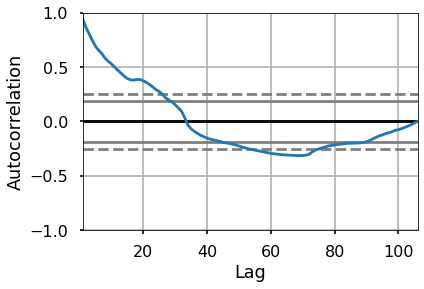

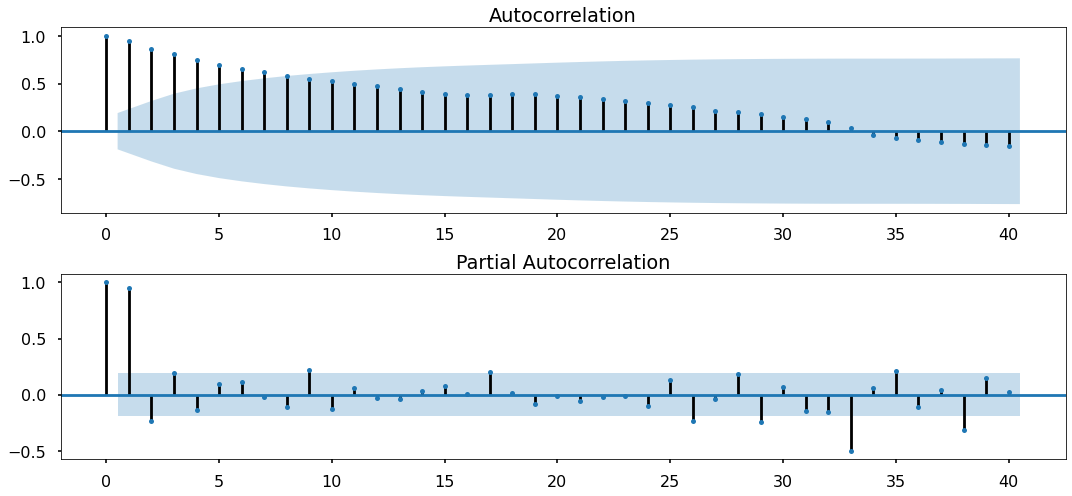

In [ ]:
# Sacar la autocorrelation del dataset
autocorrelation_plot(bitcoins_month[['Weighted_Price']].squeeze())
plt.show()

plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(bitcoins_month.Weighted_Price.values.squeeze(), lags=40, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(bitcoins_month.Weighted_Price.values.squeeze(), lags=40, ax=ax)
plt.tight_layout()
plt.show()

#### Buscar Hiperparametros

Al no saber como obtener los valores optimos de p, d, q y P, D, Q. Es una buena idea, pero tardada, buscar los valores optimos a traves de hiperparametros. 

En este caso se va a usar el metodo de **GridSearch**.

In [ ]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
    models = list()
    # define config lists
    p_params = [7]
    d_params = [1]
    q_params = [5]
    t_params = ['n'] #,'c','t','ct'
    P_params = list(range(0, 8))
    D_params = list(range(1, 3))
    Q_params = list(range(0, 8))
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

In [ ]:
# Estandarizar los datos para que el modelo lo pueda procesar mas facil
standar_scaler = StandardScaler()
standar_data = standar_scaler.fit_transform(bitcoins_month[['Weighted_Price']])
data = standar_data.squeeze()
cfg_list = sarima_configs([12])
n_test = 4
# Utilizar el grid search para encontrar la combinacion mas optima
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

 > Model[[(7, 1, 5), (0, 1, 0, 12), 'n']] 0.480
 > Model[[(7, 1, 5), (0, 1, 1, 12), 'n']] 0.269
 > Model[[(7, 1, 5), (0, 1, 2, 12), 'n']] 1189188.491
 > Model[[(7, 1, 5), (0, 2, 0, 12), 'n']] 0.751
 > Model[[(7, 1, 5), (0, 2, 2, 12), 'n']] 236870.943
 > Model[[(7, 1, 5), (0, 2, 1, 12), 'n']] 0.486
 > Model[[(7, 1, 5), (1, 1, 0, 12), 'n']] 0.283
 > Model[[(7, 1, 5), (1, 1, 1, 12), 'n']] 0.348
 > Model[[(7, 1, 5), (1, 1, 2, 12), 'n']] 9070832.391
 > Model[[(7, 1, 5), (1, 2, 0, 12), 'n']] 0.512
 > Model[[(7, 1, 5), (1, 2, 1, 12), 'n']] 0.334
 > Model[[(7, 1, 5), (1, 2, 2, 12), 'n']] 1196057219.126
 > Model[[(7, 1, 5), (2, 1, 0, 12), 'n']] 0.342
 > Model[[(7, 1, 5), (2, 1, 1, 12), 'n']] 0.319
 > Model[[(7, 1, 5), (2, 1, 2, 12), 'n']] 783766.173
 > Model[[(7, 1, 5), (2, 2, 1, 12), 'n']] 0.552
 > Model[[(7, 1, 5), (2, 2, 0, 12), 'n']] 0.768
 > Model[[(7, 1, 5), (2, 2, 2, 12), 'n']] 104840865.148
 > Model[[(7, 1, 5), (3, 1, 0, 12), 'n']] 0.517
 > Model[[(7, 1, 5), (3, 1, 1, 12), 'n']] 0.612
 

Una vez obtenido el resultado de los parametros lo aplicamos en el modelo.

In [ ]:
# Separar el dataset en dataset de entrenamiento y prueba
X = bitcoins_month[['Weighted_Price']].squeeze()

In [ ]:
# Entrenamiento y resumen del modelo
model = sm.tsa.statespace.SARIMAX(X, order=(7, 1, 5), seasonal_order=(4, 2, 0, 12))
model_fit = model.fit(disp=-1)
print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     Weighted_Price   No. Observations:                  106
Model:             SARIMAX(7, 1, 5)x(4, 2, 0, 12)   Log Likelihood                -730.973
Date:                            Mon, 23 Nov 2020   AIC                           1495.945
Time:                                    08:45:18   BIC                           1536.651
Sample:                                12-31-2011   HQIC                          1512.277
                                     - 09-30-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0198     13.693      0.001      0.999     -26.819      26.858
ar.L2          1.3359      6.237   

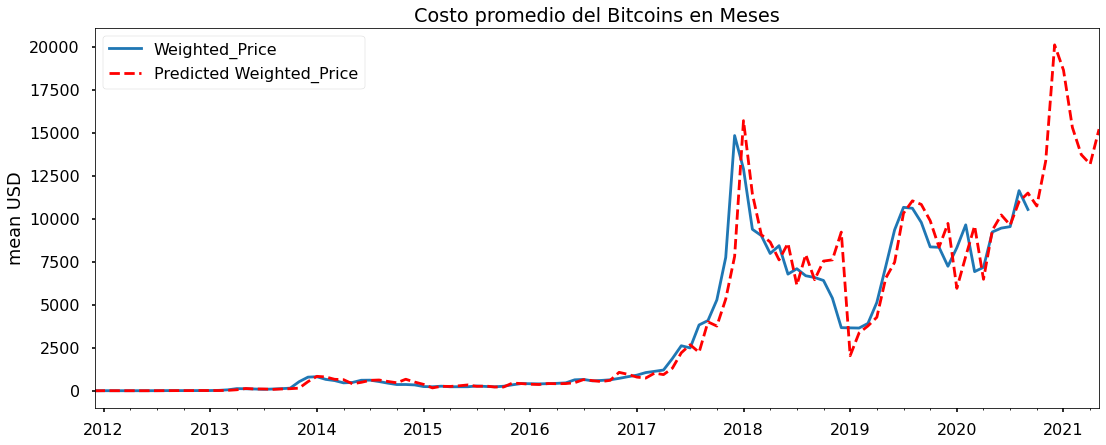

In [ ]:
# Prediccion y comparacion contra los datos originales
bitcoints_pred = bitcoins_month[['Weighted_Price']]
date_list = [datetime(2020, 10, 31), datetime(2020, 11, 30), datetime(2020, 12, 31), 
             datetime(2021, 1, 31), datetime(2021, 2, 28), 
             datetime(2021, 3, 31), datetime(2021, 4, 30), datetime(2021, 5, 31)]
future = pd.DataFrame(index=date_list, columns= bitcoins_month.columns)
bitcoints_pred = pd.concat([bitcoints_pred, future])
bitcoints_pred['forecast'] = model_fit.predict(start=0, end=113)
plt.figure(figsize=(18,7))
bitcoints_pred.Weighted_Price.plot()
bitcoints_pred.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Costo promedio del Bitcoins en Meses')
plt.ylabel('mean USD')
plt.show()

#### Resultado

In [ ]:
bitcoints_pred[['Weighted_Price', 'forecast']].tail(10)

,Weighted_Price,forecast
2020-08-31,11637.080012,11000.195303
2020-09-30,10541.968835,11498.541888
2020-10-31,NaN,10743.522787
2020-11-30,NaN,13361.864134
2020-12-31,NaN,20113.139484
2021-01-31,NaN,18644.487016
2021-02-28,NaN,15314.310313
2021-03-31,NaN,13732.581063
2021-04-30,NaN,13179.754060
2021-05-31,NaN,15212.029264


<a id="d"></a>
### 4. Conclusiones

---
[Regresar a contenido](#general)

De su análisis, qué pueden concluir? Qué posibilidades extras pudieran aplicarse o con qué finalidad realizaron el trabajo.